In [13]:
%load_ext autoreload
%autoreload 2

import sys
sys.setrecursionlimit(10000)
from IPython.display import clear_output
sys.path.append("..")

from GameFlow import Board, BoardTerminalTest, FenceChecker, MoveChecker
from Search import MinimaxSearch, AlphaBetaSearch, DLMinimaxSearch, DLAlphaBetaSearch
from Heuristics import DistanceHeuristic
from UIKit import UIBoard

grid_size = 5
fence_length = 2

fence_checker = FenceChecker(
    grid_size = grid_size,
    fence_length = fence_length
)
move_checker = MoveChecker(grid_size)

board = Board(
    grid_size = grid_size,
    fence_checker = fence_checker,
    player_positions = None,
    move_checker = move_checker,
    fences_horizontal=set(),
    fences_vertical=set()
)
terminal_test = BoardTerminalTest()
heuristic = DistanceHeuristic()
depth = 10

[autoreload of GameFlow.TerminalTest failed: Traceback (most recent call last):
  File "/Users/petrostepoyan/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/petrostepoyan/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/petrostepoyan/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/petrostepoyan/Desktop/Education/AI2/AI-Group-Project/Code/notebooks/../GameFlow/TerminalTest.py", line 4, in <module>
    class BoardTerminalTest(TerminalTest):
NameError: name 'TerminalTest' is not defined
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
tmp_board = board
search_required = False

search = DLAlphaBetaSearch(
    depth = depth,
    heuristic = heuristic
)

strategy = search.find_strategy(tmp_board, terminal_test)
print("Searching...")

while True:
    clear_output(wait=False)
    
    ui_board = UIBoard(
        board_size = tmp_board.grid_size,
        fences_horizontal = tmp_board.fences_horizontal,
        fences_vertical = tmp_board.fences_vertical,
        player_positions = tmp_board.player_positions
    )
    ui_board.print()
    
    actions = tmp_board.get_applicable_actions()
    actions_desc = [f"{i + 1}. {'' if i + 1 >= 10 else ' '} {action}" for i, action in enumerate(actions)]
    actions_desc.append("q - to quit")
    actions_desc.append("s - search again")
    
    if strategy.get(tmp_board):
        search_required = False
        best_move = strategy[tmp_board]
        best_move_index = actions.index(best_move)
        print("Suggested move:", best_move_index + 1, "|", best_move)
        print()
    else:
        print("No suggestions! Try to search again.")
    
    for action in actions_desc:
        print(action)
    
    move_num = input("What move? ")
    
    if move_num == 'q':
        break
        
    if move_num == 's':
        search = DLAlphaBetaSearch(
            depth = depth,
            heuristic = heuristic
        )

        print("Searching...")
        strategy = search.find_strategy(tmp_board, terminal_test)
        continue
        
    move_num = int(move_num)
    action = actions[move_num - 1]
    tmp_board = tmp_board.get_action_result(action)

    0   1   2   3   4
  ---------------------
0 |   | X |   |   |   | 
  --------------------
1 |   |   |   |   |   | 
  --------------------
2 |   |   |   |   |   | 
  --------------------
3 |   |   |   |   |   | 
  --------------------
4 |   |   | O |   |   | 
  ---------------------
Suggested move: 1 | Move | (2, 4) (2, 3)

1.   Move | (2, 4) (2, 3)
2.   Move | (2, 4) (3, 4)
3.   Move | (2, 4) (1, 4)
4.   PlaceFence | H at (0, 0)
5.   PlaceFence | V at (0, 0)
6.   PlaceFence | H at (0, 1)
7.   PlaceFence | V at (0, 1)
8.   PlaceFence | H at (0, 2)
9.   PlaceFence | V at (0, 2)
10.  PlaceFence | H at (0, 3)
11.  PlaceFence | V at (0, 3)
12.  PlaceFence | H at (1, 0)
13.  PlaceFence | V at (1, 0)
14.  PlaceFence | H at (1, 1)
15.  PlaceFence | V at (1, 1)
16.  PlaceFence | H at (1, 2)
17.  PlaceFence | V at (1, 2)
18.  PlaceFence | H at (1, 3)
19.  PlaceFence | V at (1, 3)
20.  PlaceFence | H at (2, 0)
21.  PlaceFence | V at (2, 0)
22.  PlaceFence | H at (2, 1)
23.  PlaceFence | V at 

In [ ]:
a_l = []
for s in range(3,9):
    fence_length = 2

    fence_checker = FenceChecker(
        grid_size = s,
        fence_length = fence_length
    )
    move_checker = MoveChecker(s)

    board = Board(
        grid_size = s,
        fence_checker = fence_checker,
        player_positions = None,
        move_checker = move_checker,
        fences_horizontal=set(),
        fences_vertical=set()
    )
    a_l.append(len(board.get_applicable_actions()))

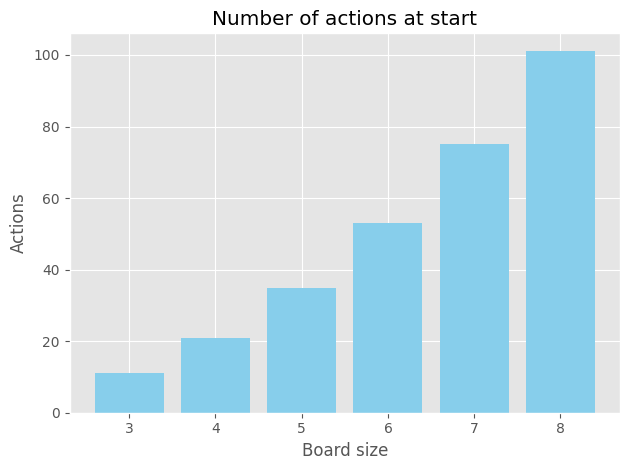

In [15]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.bar(range(3,9), a_l, color = 'skyblue')

# Adding title and labels (optional)

plt.title("Number of actions at start")
plt.xticks(range(3,9))
plt.xlabel("Board size")
plt.ylabel("Actions")
plt.tight_layout()
plt.savefig("n_actions.png", dpi = 800)
plt.show()
